In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
sales=pd.read_csv('sales.csv')
sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
sales.shape

(200, 5)

In [4]:
sales.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
sales.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
sales.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
sales.shape

(200, 4)

In [9]:
sales.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
sales.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [11]:
sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [12]:
# there are no missing values

In [13]:
# all the variables are continuous in nature

# EDA

# Univariate Analysis

In [14]:
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


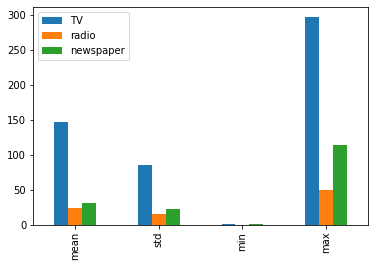

In [19]:
sales.describe().loc[['mean','std','min','max'],['TV','radio','newspaper']].plot.bar()

In [20]:
# the maximum expense is in TV

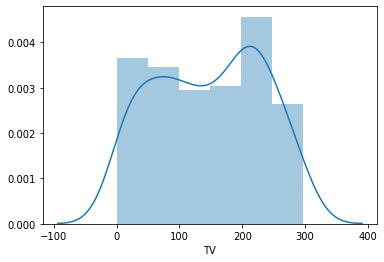

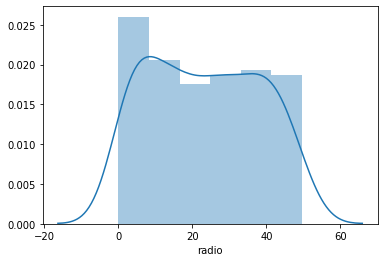

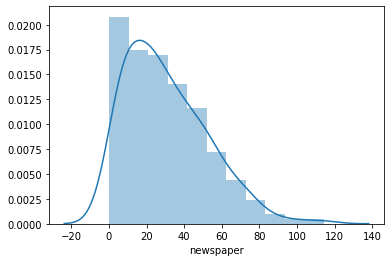

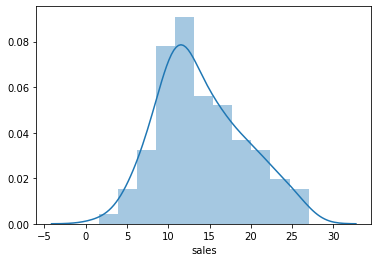

In [25]:
# making distplot
cols=sales.columns.values
for i in cols:
    plt.subplots()
    sns.distplot(sales[i])

In [23]:
# there is skewness in newspaper and sales

In [28]:
sales.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

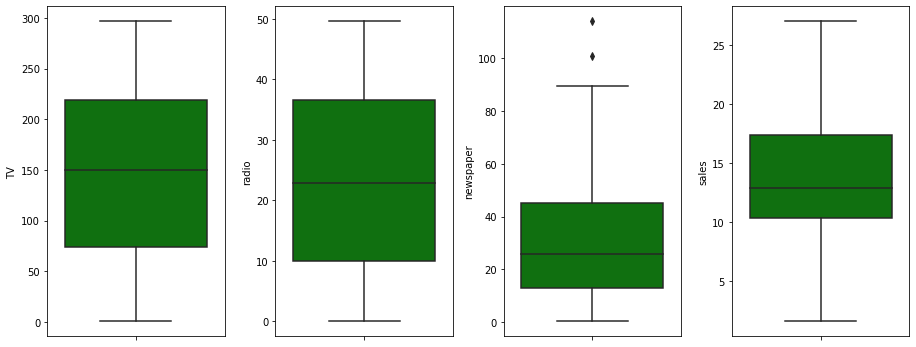

In [26]:
# creating boxplot
plt.figure(figsize=(16,24))
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    sns.boxplot(sales[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [27]:
# there are outliers in newspaper

# Bivariate Analysis

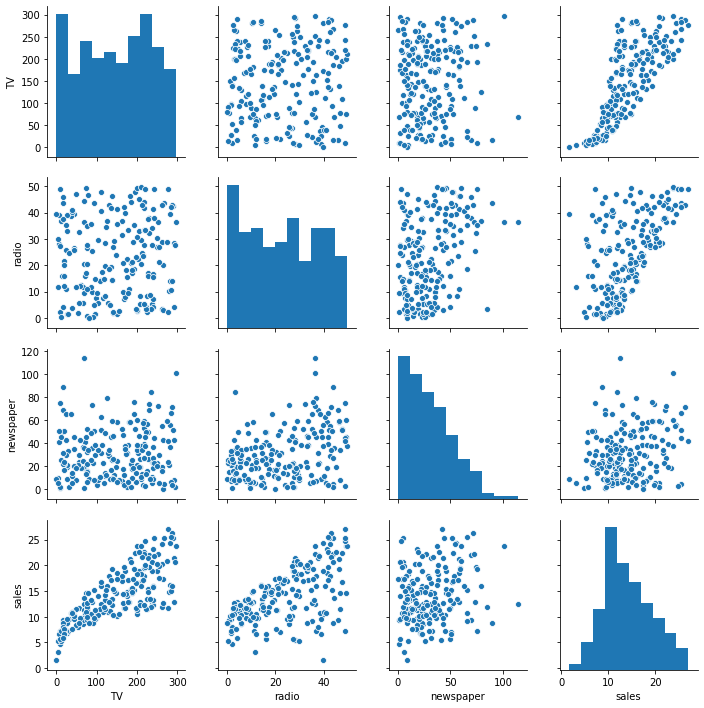

In [29]:
sns.pairplot(sales)

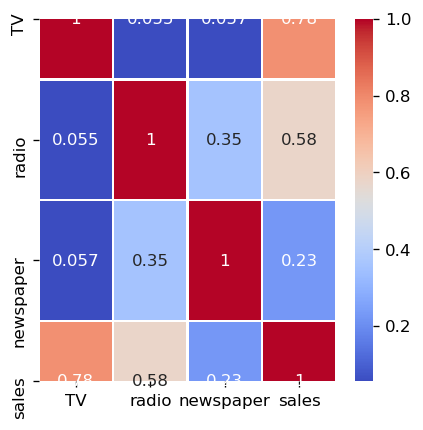

In [33]:
plt.figure(figsize=(4,4), dpi=120)
sns.heatmap(sales.corr(), annot=True, cmap='coolwarm', linewidths=1, square=False)

In [34]:
# tv and radio are highly correlated with sales
# newspaper and radio also have a moderate correlation

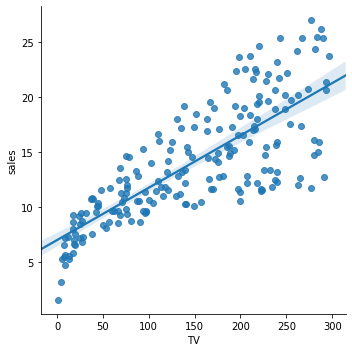

In [35]:
sns.lmplot(data=sales, x='TV', y='sales')

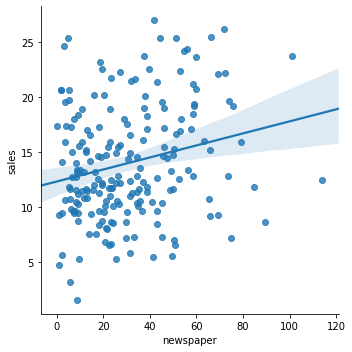

In [36]:
sns.lmplot(data=sales, x='newspaper', y='sales')

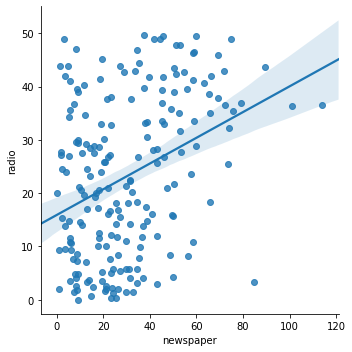

In [37]:
sns.lmplot(data=sales, x='newspaper', y='radio')

# Outliers

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(sales))

In [40]:
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [41]:
# As expected, there are two outliers in Newspaper

In [47]:
sales.iloc[[16, 101],[2]]

,newspaper
16,114.0
101,100.9


In [43]:
# Now, let's calculate the interquartile range

In [44]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR = sales.newspaper.quantile(0.75) - sales.newspaper.quantile(0.25)

Lower_fence = sales.newspaper.quantile(0.25) - (IQR * 1.5)
Upper_fence = sales.newspaper.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(93.625, -35.775000000000006, 32.35)

In [45]:
# so, the upper boundary for newspaper is 93.6
# the lower boundary has no significance here as it is negative

In [46]:
# we'll replace the value of outliers with 93.6

In [48]:
sales.iloc[[16, 101],[2]]=93.6

In [49]:
sales.iloc[[16, 101],[2]]

,newspaper
16,93.6
101,93.6


In [50]:
# the value has been updated

# Seperating Features and Target

In [51]:
x=sales.drop('sales',axis=1)

In [52]:
y=sales['sales']

In [53]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [54]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

# Model Building

In [57]:
# As it is a regression problem, we'll use:
# LinearRegression
# DecisionTreeRegressor
# KNeighborsRegressor
# SVR
# Ridge
# Lasso
# RandomForestRegressor
# XGBRegressor

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
# Now, we'll define some important function to reuse them

In [59]:
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)

In [61]:
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

In [62]:
def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

In [63]:
def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return test_score,mse,rmse,mae

In [82]:
lr=LinearRegression(n_jobs=-1)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

In [65]:
# first, we'll get an idea of how each model is performing

In [83]:
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))

LR  (0.8932861387935352, 0.8920632216942262, 1.5107975583034785)
DT  (1.0, 0.9397985817496068, 1.1413150310059006)
SVR  (0.2422666150166396, -927559.6431473036, 5.173866919397251)
KNN  (0.952880765245601, 0.8861522085854923, 1.4944376868909595)
RID  (0.8932861385090508, 0.892058692647184, 1.5108127701235403)
LS  (0.8929130571472261, 0.8891929435257901, 1.5118967793799638)
RF  (0.9951659139262652, 0.9746591143154771, 0.7371105751513817)
XGB  (0.9999998977829063, 0.976117332731033, 0.7208288528805188)


In [84]:
# now, let's check the performance of every model on scaled data

In [68]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
xs.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.824054
1,-1.197376,1.082808,0.690619
2,-1.516155,1.528463,1.828757
3,0.052050,1.217855,1.320828
4,0.394182,-0.841614,1.316125


In [85]:
print("LR ", get_score(lr,xs,y))
print("DT ", get_score(dt,xs,y))
print("SVR ", get_score(svr,xs,y))
print("KNN ", get_score(knn,xs,y))
print("RID ", get_score(rid,xs,y))
print("LS ", get_score(ls,xs,y))
print("RF ", get_score(rf,xs,y))
print("XGB ", get_score(xgb,xs,y))

LR  (0.8932861387935352, 0.8920632216942262, 1.510797558303478)
DT  (1.0, 0.9397985817496068, 1.1413150310059006)
SVR  (0.9142898477507999, 0.9411281583259612, 1.031995259593213)
KNN  (0.9636800796029094, 0.9330040258812228, 1.171569886946571)
RID  (0.8932489846285984, 0.8909076683547681, 1.50891825162769)
LS  (0.8274512258539313, 0.6280639150422924, 2.0540999246678275)
RF  (0.995141962339266, 0.974614868249652, 0.7377167478104323)
XGB  (0.9999998977829063, 0.976117332731033, 0.7208288528805188)


In [86]:
# so, from above obsevations, our top four models are
# DT with x
# RF with x
# xgb with any
# svr with xs
# knn with xs

In [87]:
# now, we'll try each model and try to improve the performance

# DecisionTreeRegressor

In [128]:
# pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [77]:
# hyper parameter tuning
# we'll create a function for it
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_

In [78]:
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=5,n_iter=50,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

In [89]:
param_dt={'splitter':['best','random'],'max_depth':[2,3,4,5],'min_samples_leaf':[1,2,3,4],'max_features':['auto','sqrt','log2']}
dt=DecisionTreeRegressor(random_state=45)

In [90]:
gridcv(dt,param_dt,x,y)

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [91]:
dt1=DecisionTreeRegressor(random_state=45, max_depth= 5,
 max_features= 'auto',
 min_samples_leaf= 2,
 splitter= 'best')

In [92]:
get_score(dt1,x,y)

(0.9877256942326417, 0.9024315648606167, 1.3900782931179572)

In [93]:
# the score decreased
# the default model was better

In [94]:
dt.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=45, splitter='best')

In [95]:
# Let's apply some feature engineering on dt

In [96]:
# We'll apply BFE and PCA

In [102]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

In [99]:
from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()

In [112]:
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

In [103]:
x1bfe=bfe(dt,x,y,2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished

[2020-03-16 18:26:14] Features: 2/2 -- score: 0.9586975119283558

In [105]:
x1bfe.head(1)

,TV,radio
0,230.1,37.8


In [106]:
get_score(dt,x1bfe,y)

(1.0, 0.9517828489943163, 1.0282995672468214)

In [108]:
# score has improved

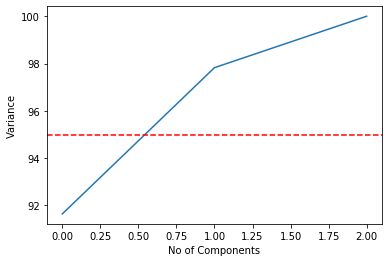

In [109]:
#PCA
nforpca(x)

In [113]:
x1pca=pca(dt,x,2)
get_score(dt,x1pca,y)

(1.0, 0.29284925703479503, 3.65882494798535)

In [114]:
x1pca.head()

,0,1
0,83.803249,39.868980
1,-102.131111,21.490694
2,-128.976620,46.906211
3,5.082512,32.695208
4,34.070323,20.697106


In [115]:
# pca decreased our score

In [116]:
# now, let's do hyper parameter tuning for dt and x1bfe again
gridcv(dt,param_dt,x1bfe,y)

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'splitter': 'best'}

In [122]:
dt2=DecisionTreeRegressor(random_state=45, max_depth= 5,
 max_features= 'auto',
 min_samples_leaf= 3,
 splitter= 'best')

In [118]:
get_score(dt2,x1bfe,y)

(0.9838335556877466, 0.9127518522151459, 1.329380847904584)

In [119]:
# score reduced

In [120]:
randomcv(dt,param_dt,x1bfe,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.0s finished


{'splitter': 'best',
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4}

In [123]:
dt3=DecisionTreeRegressor(random_state=45, max_depth= 4,
 max_features= 'auto',
 min_samples_leaf= 2,
 splitter= 'best')

In [124]:
get_score(dt3,x1bfe,y)

(0.9652535781577463, 0.8795357413482217, 1.5752081251117012)

In [125]:
# score reduced further

In [126]:
# the best model is dt with x1bfe
# let's boost it
ada=AdaBoostRegressor(base_estimator=dt, n_estimators=50, learning_rate=0.1, random_state=45)
get_score(ada,x1bfe,y)

(0.9999976238504961, 0.9683133690243088, 0.8339064695755752)

In [127]:
# the score has improved

In [132]:
# let's cross validate it
def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

In [136]:
cross(ada,x1bfe,y,6)

(0.9768320960982321, 0.0038744944225275056)

In [137]:
# cross_val score has increased

In [160]:
# evaluation metrics
te,mse,rmse,mae=get_metrics(ada,x1bfe,y)
print("Test Score: ", te)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Test Score:  0.9683133690243088
Mean_Squared_Error:  0.6953999999999998
Root_Mean_Squared_Error:  0.8339064695755752
Mean_Absolute_Error:  0.6579999999999999


# SVC

In [138]:
# svc with xs

In [139]:
# pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation

In [141]:
# now, let's apply BFE
x2bfe=bfe(svr,xs,y,2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished

[2020-03-16 19:44:02] Features: 2/2 -- score: 0.9550190962375978

In [143]:
x2bfe.head(1)
get_score(svr,x2bfe,y)

(0.9587255225448679, 0.9584957282911117, 0.897541736484958)

In [144]:
# results improved

In [145]:
# SVR?

In [146]:
# now, let's try hyper parameter tuning for svr and x2bfe
param_svr={'kernel':['rbf','poly','sigmoid'],'degree':[2,3,4,5,6],'gamma':['auto','scale',0.05,0.1,0.5,0.7],'C':[1.0,1.5,2.0]}
gridcv(svr,param_svr,x2bfe,y)

{'C': 2.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [147]:
svr1=SVR(C= 2.0, degree= 2, gamma= 'scale', kernel= 'rbf')
get_score(svr1,x2bfe,y)

(0.9785272717634304, 0.9827618395215407, 0.6194131800054347)

In [148]:
# the result improved significantly

In [155]:
# let's try to boost it
adasvr=AdaBoostRegressor(base_estimator=svr1, n_estimators=200, learning_rate=0.01, random_state=45)
get_score(adasvr,x2bfe,y)

(0.9827323928079483, 0.9847768737562052, 0.591633637531359)

In [156]:
# the result improved

In [157]:
# let's cross validate it
cross(adasvr,x2bfe,y,5)

(0.9803205552133475, 0.014714009589441253)

In [158]:
# no over fitting or under fitting

In [159]:
# evaluation metrics
te,mse,rmse,mae=get_metrics(adasvr,x2bfe,y)
print("Test Score: ", te)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Test Score:  0.9847768737562052
Mean_Squared_Error:  0.35003036105858754
Root_Mean_Squared_Error:  0.591633637531359
Mean_Absolute_Error:  0.4448645567897353


# KNN

In [161]:
# knn with xs

In [162]:
# pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation

In [163]:
# let's apply BFE
x3bfe=bfe(knn,xs,y,2)
x3bfe.head(1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished

[2020-03-16 20:08:16] Features: 2/2 -- score: 0.9668253236630152

,TV,radio
0,0.969852,0.981522


In [164]:
get_score(knn,x3bfe,y)

(0.979469117826458, 0.9811070613263495, 0.6642469420328556)

In [165]:
# the score has improved significantly

In [168]:
# now, let's apply hyper parameter tuning with knn and x3bfe
# KNeighborsRegressor?

In [167]:
param_knn={'n_neighbors':range(2,8),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
          'p':[1,2]}
gridcv(knn,param_knn,x3bfe,y)

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [169]:
knn1=KNeighborsRegressor(n_jobs=-1, algorithm= 'auto', n_neighbors= 7, p= 1, weights= 'distance')
get_score(knn1,x3bfe,y)

(1.0, 0.9824953831303048, 0.6273073652415441)

In [170]:
# the results has improved slightly

In [171]:
# let's apply random cv
ran_param_knn={'n_neighbors':range(2,20)}
randomcv(knn,ran_param_knn,x3bfe,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.5s finished


{'n_neighbors': 2}

In [172]:
knn2=KNeighborsRegressor(n_jobs=-1, n_neighbors= 2)
get_score(knn2,x3bfe,y)

(0.991358538291673, 0.9782277318292572, 0.7146677549742958)

In [174]:
# let's apply random cv again
ran_param_knn_2={'n_neighbors':range(2,20),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
          'p':[1,2]}
randomcv(knn,ran_param_knn_2,x3bfe,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.2s finished


{'weights': 'distance', 'p': 1, 'n_neighbors': 8, 'algorithm': 'auto'}

In [175]:
knn3=KNeighborsRegressor(n_jobs=-1, algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'distance')
get_score(knn3,x3bfe,y)

(1.0, 0.9806302205778079, 0.6579653621334653)

In [176]:
# the best result is knn1 with x3bfe

In [177]:
# let's boost knn1 with x3bfe
adaknn=AdaBoostRegressor(base_estimator=knn1, n_estimators=200, learning_rate=0.01, random_state=45)
get_score(adaknn,x3bfe,y)

(1.0, 0.9855087257500528, 0.5678987265177334)

In [178]:
# let's cross validate adaknn with x3bfe
cross(adaknn,x3bfe,y,5)

(0.976850176470303, 0.023313698669274616)

In [179]:
# no over fitting or under fitting

In [180]:
# evaluation metrics
te,mse,rmse,mae=get_metrics(adaknn,x3bfe,y)
print("Test Score: ", te)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Test Score:  0.9855087257500528
Mean_Squared_Error:  0.3225089635804634
Root_Mean_Squared_Error:  0.5678987265177334
Mean_Absolute_Error:  0.42784820903347975


# RandomForestRegressor

In [181]:
# RF with x

In [182]:
# let's apply BFE
x4bfe=bfe(rf,x,y,2)
x4bfe.head(1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished

[2020-03-16 20:37:35] Features: 2/2 -- score: 0.9756895028014142

,TV,radio
0,230.1,37.8


In [183]:
get_score(rf,x4bfe,y)

(0.9960214227936512, 0.9784929234877942, 0.6718913602659291)

In [184]:
# the result has slightly improved

In [185]:
# Now, let's apply hyper parameter tuning on rf and x4bfe

In [186]:
RandomForestRegressor?

In [187]:
param_rf={'n_estimators':range(100,1200,100),'max_depth':[1,2,3,4,5,6],'min_samples_leaf':[1,2,3],
          'max_features':['auto','sqrt','log2']}
randomcv(rf,param_rf,x4bfe,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished


{'n_estimators': 400,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6}

In [188]:
rf1=RandomForestRegressor(n_jobs=-1, random_state=45, n_estimators= 400,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 6,verbose=3)
get_score(rf1,x4bfe,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400building tree 6 of 400building tree 7 of 400

building tree 8 of 400

building tree 9 of 400building tree 10 of 400
building tree 11 of 400

building tree 12 of 400
building tree 13 of 400building tree 14 of 400
building tree 15 of 400building tree 16 of 400


building tree 17 of 400building tree 18 of 400

building tree 19 of 400building tree 20 of 400

building tree 21 of 400building tree 22 of 400building tree 23 of 400
building tree 24 of 400


building tree 25 of 400building tree 26 of 400building tree 27 of 400building tree 28 of 400



building tree 29 of 400building tree 30 of 400building tree 31 of 400


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 326 of 400

building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400building tree 339 of 400

building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400building tree 346 of 400


building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400building tree 356 of 400

building tree 357 of 400building tree 358 of 400
building tree 359 of 400

building tree 360 of 400
building tree 361 of 400building tree 362 of 400building tree 363 of 400


building tree 364 of 400building tree 365 of 400


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished


(0.9963788812154764, 0.978105773516027, 0.6779834672855828)

In [189]:
# result decreased slightly

In [190]:
# let's use gridsearch
grid_param_rf={'n_estimators':range(50,550,50),'max_depth':[1,2,3,4,5,6,7,8],'min_samples_leaf':[1,2,3,4],
          'max_features':['auto','sqrt','log2']}
gridcv(rf,grid_param_rf,x4bfe,y)

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [191]:
# took around 13 minutes

In [192]:
rf2=RandomForestRegressor(n_jobs=-1, random_state=45, n_estimators= 150,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 8,verbose=3)
get_score(rf2,x4bfe,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150building tree 12 of 150



building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150
building tree 38 of 150

building tree 39 of 150building tree 40 of 150building tree 41 of 150


building tree 42 of 150
b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


(0.9975076529176816, 0.9805404578088521, 0.6440488728976211)

In [193]:
# the score has improved

In [194]:
# let's cross valiadte rf2 with x4bfe
cross(rf2,x4bfe,y,5)

(0.9785659481834745, 0.009751446286676537)

In [195]:
# no problem of over fitting or under fitting

In [196]:
# evaluation metrics
te,mse,rmse,mae=get_metrics(rf2,x4bfe,y)
print("Test Score: ", te)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150building tree 18 of 150


building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150building tree 39 of 150



building tree 40 of 150building tree 41 of 150building tree 42 of 150
bui

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


In [229]:
# let's try to use adaboost on rf2 with x4bfe
adarf=AdaBoostRegressor(base_estimator=rf2, n_estimators=100, learning_rate=0.1, random_state=45)
get_score(adarf,x4bfe,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150

building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150building tree 12 of 150


building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150building tree 35 of 150

building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150
building tree 16 of 150
building tree 17 of 150

building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150
building tree 20 of 150
building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150building tree 5 of 150
building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150
building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150
building tree 10 of 150

building tree 11 of 150building tree 12 of 150building tree 13 of 150
building tree 14 of 150


building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150

building tree 12 of 150

building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150building tree 20 of 150



building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150building tree 39 of 150

building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150
building tree 16 of 150


building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150

building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150building tree 3 of 150
building tree 4 of 150

building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150building tree 20 of 150



building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150
building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150building tree 35 of 150

building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150building tree 12 of 150


building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150building tree 38 of 150
building tree 39 of 150


building tree 40 of 150building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150
building tree 20 of 150


building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150building tree 36 of 150


building tree 37 of 150
building tree 38 of 150building tree 39 of 150building tree 40 of 150


building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150
building tree 17 of 150
building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150

building tree 9 of 150
building tree 10 of 150
building tree 11 of 150building tree 12 of 150

building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150
building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150
building tree 29 of 150

building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150building tree 30 of 150


building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150


building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150building tree 17 of 150building tree 18 of 150


building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150building tree 25 of 150


building tree 26 of 150
building tree 27 of 150building tree 28 of 150building tree 29 of 150
building tree 30 of 150


building tree 31 of 150building tree 32 of 150
building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150building tree 11 of 150

building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150building tree 17 of 150building tree 18 of 150


building tree 19 of 150
building tree 20 of 150building tree 21 of 150
building tree 22 of 150
building tree 23 of 150

building tree 24 of 150building tree 25 of 150
building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150
building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150

building tree 18 of 150building tree 19 of 150

building tree 20 of 150building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150building tree 26 of 150

building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150building tree 36 of 150


building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150building tree 5 of 150building tree 6 of 150


building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150building tree 30 of 150


building tree 31 of 150
building tree 32 of 150building tree 33 of 150building tree 34 of 150


building tree 35 of 150building tree 36 of 150building tree 37 of 150


building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150building tree 18 of 150


building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150building tree 30 of 150


building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150
building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150building tree 9 of 150building tree 10 of 150


building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150building tree 35 of 150


building tree 36 of 150building tree 37 of 150
building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150building tree 24 of 150


building tree 25 of 150building tree 26 of 150building tree 27 of 150building tree 28 of 150



building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150
building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150
building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150building tree 38 of 150
building tree 39 of 150


building tree 40 of 150building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150
building tree 16 of 150


building tree 17 of 150building tree 18 of 150
building tree 19 of 150building tree 20 of 150


building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150building tree 42 of 150


b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150
building tree 4 of 150


building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150
building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150
building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150building tree 41 of 150
building tree 42 of 150


b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150building tree 5 of 150

building tree 6 of 150
building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150building tree 11 of 150

building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150
building tree 18 of 150
building tree 19 of 150

building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150building tree 26 of 150

building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150building tree 32 of 150



building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150building tree 24 of 150



building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150
building tree 10 of 150building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150
building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150building tree 16 of 150

building tree 17 of 150

building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150building tree 36 of 150


building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150
building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150building tree 5 of 150
building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150
building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s


building tree 144 of 150
building tree 145 of 150
building tree 146 of 150building tree 147 of 150

building tree 148 of 150
building tree 149 of 150
building tree 150 of 150


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150
building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150
building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150building tree 12 of 150
building tree 13 of 150
building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150
building tree 23 of 150building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150building tree 12 of 150
building tree 13 of 150

building tree 14 of 150building tree 15 of 150
building tree 16 of 150

building tree 17 of 150
building tree 18 of 150building tree 19 of 150
building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150building tree 25 of 150building tree 26 of 150


building tree 27 of 150building tree 28 of 150
building tree 29 of 150

building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 135 of 150

building tree 136 of 150
building tree 137 of 150building tree 138 of 150building tree 139 of 150


building tree 140 of 150building tree 141 of 150building tree 142 of 150


building tree 143 of 150
building tree 144 of 150building tree 145 of 150building tree 146 of 150


building tree 147 of 150building tree 148 of 150

building tree 149 of 150
building tree 150 of 150


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150building tree 11 of 150

building tree 12 of 150

building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150building tree 25 of 150
building tree 26 of 150


building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150building tree 36 of 150


building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150
building tree 16 of 150


building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150
building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150building tree 35 of 150


building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150
building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150building tree 29 of 150building tree 30 of 150



building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150
building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150
building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150
building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150
building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150building tree 12 of 150


building tree 13 of 150
building tree 14 of 150building tree 15 of 150
building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150
building tree 16 of 150


building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150building tree 42 of 150buil

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150building tree 32 of 150



building tree 33 of 150building tree 34 of 150building tree 35 of 150building tree 36 of 150



building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150
building tree 8 of 150


building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150
building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150
building tree 32 of 150


building tree 33 of 150
building tree 34 of 150building tree 35 of 150building tree 36 of 150


building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150building tree 8 of 150


building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150building tree 20 of 150



building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150

building tree 8 of 150

building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150
building tree 20 of 150

building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150building tree 17 of 150


building tree 18 of 150
building tree 19 of 150building tree 20 of 150building tree 21 of 150


building tree 22 of 150building tree 23 of 150building tree 24 of 150


building tree 25 of 150
building tree 26 of 150building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150


building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150building tree 41 of 150


building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150
building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150

building tree 24 of 150

building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150
building tree 32 of 150


building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150building tree 39 of 150

building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150building tree 22 of 150


building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150
building tree 30 of 150
building tree 31 of 150

building tree 32 of 150building tree 33 of 150building tree 34 of 150building tree 35 of 150



building tree 36 of 150building tree 37 of 150
building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150
building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150
building tree 32 of 150

building tree 33 of 150building tree 34 of 150building tree 35 of 150building tree 36 of 150



building tree 37 of 150building tree 38 of 150
building tree 39 of 150
building tree 40 of 150

building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150building tree 34 of 150


building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150building tree 5 of 150building tree 6 of 150
building tree 7 of 150


building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150
building tree 21 of 150
building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150building tree 29 of 150


building tree 30 of 150
building tree 31 of 150building tree 32 of 150
building tree 33 of 150

building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150building tree 32 of 150



building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150building tree 12 of 150


building tree 13 of 150building tree 14 of 150building tree 15 of 150building tree 16 of 150



building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150building tree 34 of 150
building tree 35 of 150building tree 36 of 150


building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150

building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150building tree 17 of 150

building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150building tree 37 of 150


building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150building tree 28 of 150


building tree 29 of 150building tree 30 of 150building tree 31 of 150


building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150building tree 28 of 150


building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150building tree 37 of 150


building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150building tree 30 of 150


building tree 31 of 150
building tree 32 of 150building tree 33 of 150building tree 34 of 150


building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150building tree 35 of 150building tree 36 of 150



building tree 37 of 150building tree 38 of 150building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150

building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150building tree 16 of 150


building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150building tree 24 of 150
building tree 25 of 150

building tree 26 of 150building tree 27 of 150building tree 28 of 150


building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150building tree 40 of 150


building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150building tree 4 of 150

building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150building tree 28 of 150building tree 29 of 150

building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150building tree 29 of 150
building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150
building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150building tree 42 of 150


b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150building tree 32 of 150building tree 33 of 150


building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150building tree 20 of 150



building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150building tree 17 of 150
building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150building tree 22 of 150


building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150building tree 35 of 150


building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150building tree 18 of 150building tree 19 of 150



building tree 20 of 150building tree 21 of 150
building tree 22 of 150
building tree 23 of 150

building tree 24 of 150building tree 25 of 150
building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150
building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150
building tree 16 of 150


building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150
building tree 30 of 150building tree 31 of 150


building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150
building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150
building tree 22 of 150

building tree 23 of 150
building tree 24 of 150building tree 25 of 150building tree 26 of 150


building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150

building tree 8 of 150

building tree 9 of 150building tree 10 of 150building tree 11 of 150

building tree 12 of 150

building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150building tree 24 of 150
building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150building tree 32 of 150building tree 33 of 150


building tree 34 of 150
building tree 35 of 150building tree 36 of 150building tree 37 of 150


building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150building tree 22 of 150


building tree 23 of 150
building tree 24 of 150building tree 25 of 150
building tree 26 of 150

building tree 27 of 150building tree 28 of 150building tree 29 of 150


building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150building tree 34 of 150


building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150building tree 8 of 150


building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150

building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150building tree 24 of 150



building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150building tree 32 of 150



building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s f

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend 

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend 

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s f

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      |

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s f

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      |

(0.9987957559004685, 0.9815509689063477, 0.6246676156893078)

In [230]:
# grid search was taking a lot of time,
# so instead, tried manual iterations with various combo of learning_rate and n_estimators
# the best came out as shown above

In [231]:
# the score improved a little

In [232]:
# let's cross validate adarf with x4bfe
cross(adarf,x4bfe,y)

(0.9805108116144197, 0.01083042552475749)

In [233]:
# no over fitting or under fitting

In [234]:
# evaluation metrics
te,mse,rmse,mae=get_metrics(adarf,x4bfe,y)
print("Test Score: ", te)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150
building tree 14 of 150building tree 15 of 150
building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150building tree 28 of 150


building tree 29 of 150building tree 30 of 150
building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150building tree 7 of 150
building tree 8 of 150


building tree 9 of 150building tree 10 of 150building tree 11 of 150

building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150
building tree 16 of 150


building tree 17 of 150building tree 18 of 150
building tree 19 of 150
building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150

building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150building tree 22 of 150


building tree 23 of 150building tree 24 of 150building tree 25 of 150


building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150building tree 41 of 150


building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150building tree 12 of 150
building tree 13 of 150

building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150building tree 19 of 150
building tree 20 of 150

building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150building tree 32 of 150



building tree 33 of 150building tree 34 of 150building tree 35 of 150


building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150
building tree 40 of 150


building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150
building tree 2 of 150building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150
building tree 9 of 150

building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150building tree 17 of 150
building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150
building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150


building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150

building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150
building tree 40 of 150


building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150building tree 8 of 150



building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150building tree 12 of 150
building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150
building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150
building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150
building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150building tree 28 of 150


building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150building tree 36 of 150


building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150
building tree 19 of 150
building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150
building tree 24 of 150


building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150building tree 42 of 150
bui

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150
building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150
building tree 42 of 150bui

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150building tree 16 of 150


building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150building tree 36 of 150


building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150building tree 16 of 150



building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150building tree 37 of 150

building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150building tree 33 of 150building tree 34 of 150

building tree 35 of 150

building tree 36 of 150building tree 37 of 150
building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150
building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150
building tree 12 of 150

building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150building tree 20 of 150



building tree 21 of 150
building tree 22 of 150building tree 23 of 150
building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150
building tree 32 of 150building tree 33 of 150


building tree 34 of 150building tree 35 of 150building tree 36 of 150
building tree 37 of 150


building tree 38 of 150building tree 39 of 150
building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150building tree 8 of 150


building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150
building tree 21 of 150

building tree 22 of 150building tree 23 of 150
building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150building tree 42 of 150


b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150building tree 39 of 150

building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150building tree 3 of 150
building tree 4 of 150


building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150building tree 25 of 150building tree 26 of 150
building tree 27 of 150


building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150building tree 35 of 150


building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150building tree 32 of 150


building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150
building tree 8 of 150


building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150

building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150building tree 39 of 150

building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150
building tree 14 of 150building tree 15 of 150building tree 16 of 150


building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150

building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150
building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150building tree 28 of 150


building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150
building tree 22 of 150
building tree 23 of 150

building tree 24 of 150building tree 25 of 150
building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150building tree 38 of 150

building tree 39 of 150

building tree 40 of 150building tree 41 of 150
building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150
building tree 4 of 150


building tree 5 of 150
building tree 6 of 150building tree 7 of 150
building tree 8 of 150

building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150building tree 27 of 150

building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150
building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150
building tree 4 of 150


building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150
building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150building tree 30 of 150
building tree 31 of 150


building tree 32 of 150building tree 33 of 150building tree 34 of 150

building tree 35 of 150

building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150
building tree 15 of 150
building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150
building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150building tree 30 of 150


building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150
building tree 38 of 150
building tree 39 of 150

building tree 40 of 150building tree 41 of 150building tree 42 of 150buil

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150
building tree 40 of 150
building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150building tree 35 of 150
building tree 36 of 150


building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150
building tree 22 of 150building tree 23 of 150


building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150building tree 16 of 150



building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150
building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150
building tree 4 of 150


building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150

building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150

building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150

building tree 37 of 150building tree 38 of 150building tree 39 of 150building tree 40 of 150



building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150

building tree 20 of 150

building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150
building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150building tree 9 of 150

building tree 10 of 150
building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150building tree 15 of 150

building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150building tree 42 of 150


b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150building tree 25 of 150

building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150building tree 30 of 150


building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150building tree 42 of 150

bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150building tree 30 of 150


building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150


building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150
building tree 24 of 150

building tree 25 of 150
building tree 26 of 150building tree 27 of 150building tree 28 of 150


building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150

building tree 38 of 150building tree 39 of 150
building tree 40 of 150

building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150

building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150building tree 16 of 150


building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150building tree 39 of 150
building tree 40 of 150


building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150
building tree 4 of 150


building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150building tree 35 of 150
building tree 36 of 150


building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150building tree 17 of 150

building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150
building tree 32 of 150

building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150
building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150building tree 37 of 150


building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150

building tree 4 of 150

building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150
building tree 14 of 150

building tree 15 of 150
building tree 16 of 150building tree 17 of 150
building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150building tree 25 of 150
building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150building tree 30 of 150

building tree 31 of 150

building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150building tree 37 of 150


building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150building tree 9 of 150

building tree 10 of 150building tree 11 of 150

building tree 12 of 150building tree 13 of 150building tree 14 of 150


building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150

building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150


building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150building tree 16 of 150


building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150building tree 34 of 150building tree 35 of 150
building tree 36 of 150


building tree 37 of 150building tree 38 of 150building tree 39 of 150building tree 40 of 150



building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150building tree 7 of 150
building tree 8 of 150


building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150
building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150


building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150
building tree 19 of 150
building tree 20 of 150

building tree 21 of 150building tree 22 of 150
building tree 23 of 150

building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150
building tree 39 of 150


building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150building tree 22 of 150

building tree 23 of 150

building tree 24 of 150building tree 25 of 150building tree 26 of 150


building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150building tree 12 of 150


building tree 13 of 150building tree 14 of 150
building tree 15 of 150building tree 16 of 150


building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150
building tree 27 of 150building tree 28 of 150


building tree 29 of 150building tree 30 of 150
building tree 31 of 150
building tree 32 of 150

building tree 33 of 150building tree 34 of 150building tree 35 of 150building tree 36 of 150



building tree 37 of 150building tree 38 of 150building tree 39 of 150

building tree 40 of 150

building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150building tree 8 of 150


building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150building tree 4 of 150

building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150
building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150building tree 12 of 150


building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150

building tree 38 of 150
building tree 39 of 150building tree 40 of 150
building tree 41 of 150
building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150

building tree 37 of 150building tree 38 of 150building tree 39 of 150building tree 40 of 150



building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150
building tree 10 of 150building tree 11 of 150

building tree 12 of 150building tree 13 of 150
building tree 14 of 150building tree 15 of 150


building tree 16 of 150building tree 17 of 150building tree 18 of 150


building tree 19 of 150
building tree 20 of 150building tree 21 of 150building tree 22 of 150

building tree 23 of 150

building tree 24 of 150building tree 25 of 150

building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150
building tree 30 of 150
building tree 31 of 150

building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150building tree 37 of 150building tree 38 of 150

building tree 39 of 150

building tree 40 of 150building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150building tree 7 of 150

building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150building tree 12 of 150


building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150
building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150


building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150building tree 28 of 150


building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150building tree 7 of 150


building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150


building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150
building tree 19 of 150

building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150building tree 31 of 150

building tree 32 of 150

building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150
building tree 40 of 150

building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150building tree 36 of 150


building tree 37 of 150building tree 38 of 150
building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150
building tree 11 of 150building tree 12 of 150


building tree 13 of 150building tree 14 of 150

building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150building tree 19 of 150


building tree 20 of 150
building tree 21 of 150building tree 22 of 150building tree 23 of 150


building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150
building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150building tree 21 of 150
building tree 22 of 150
building tree 23 of 150

building tree 24 of 150building tree 25 of 150building tree 26 of 150


building tree 27 of 150
building tree 28 of 150building tree 29 of 150
building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150
building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150

building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150building tree 16 of 150

building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150
building tree 25 of 150
building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150building tree 23 of 150

building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150building tree 33 of 150building tree 34 of 150


building tree 35 of 150building tree 36 of 150

building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150building tree 41 of 150


building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150building tree 31 of 150
building tree 32 of 150


building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150building tree 42 of 150
bu

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150

building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150building tree 11 of 150

building tree 12 of 150

building tree 13 of 150building tree 14 of 150
building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150building tree 20 of 150

building tree 21 of 150building tree 22 of 150

building tree 23 of 150building tree 24 of 150

building tree 25 of 150building tree 26 of 150building tree 27 of 150


building tree 28 of 150
building tree 29 of 150building tree 30 of 150
building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150

building tree 37 of 150building tree 38 of 150
building tree 39 of 150
building tree 40 of 150

building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBacken

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s f

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      |

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      |

Test Score:  0.9815509689063477
Mean_Squared_Error:  0.3902096300909648
Root_Mean_Squared_Error:  0.6246676156893078
Mean_Absolute_Error:  0.4756747427757425


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


# XGBRegressor

In [202]:
# let's apply BFE
x5bfe=bfe(xgb,x,y,2)
x5bfe.head(1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2020-03-16 21:58:40] Features: 2/2 -- score: 0.9681333736278768

,TV,radio
0,230.1,37.8


In [203]:
get_score(xgb,x5bfe,y)

(0.9999985411606528, 0.9735433170771032, 0.7598692451406375)

In [204]:
# the score reduced slightly
# we won't use BFE

In [205]:
# let's try PCA
x2pca=pca(xgb,x,2)
get_score(xgb,x2pca,y)

(0.9999867697033901, 0.4578009231586957, 3.1680708897657297)

In [206]:
# the model is over fitting a lot
# we won't use PCA

In [207]:
# let's tune the hyper parameters of xgb with x

In [208]:
XGBRegressor?

In [209]:
param_xgb={'n_estimators':range(50,500,100),'max_depth':[2,3,4,5,6,7,8],'learning_rate':[0.05,0.1,0.20,0.5],
        'booster':['gbtree','gblinear','dart'],
        'min_child_weight':[1,2,3,4]}
gridcv(xgb,param_xgb,x,y)

{'booster': 'gbtree',
 'learning_rate': 0.2,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 450}

In [210]:
# it took around 8 minutes

In [211]:
xgb1=XGBRegressor(n_jobs=-1, random_state=45, booster= 'gbtree',
 learning_rate= 0.2,
 max_depth= 2,
 min_child_weight= 1,
 n_estimators= 450)
get_score(xgb1,x,y)

(0.9998592000094714, 0.979802012998142, 0.651517817003652)

In [212]:
# the score has improved

In [213]:
# let's cross validate xgb1 with x
cross(xgb1,x,y,5)

(0.9797547429014113, 0.005824058735709205)

In [214]:
# no problem of over fitting or under fitting

In [215]:
# evaluation metrics
te,mse,rmse,mae=get_metrics(xgb1,x,y)
print("Test Score: ", te)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Test Score:  0.979802012998142
Mean_Squared_Error:  0.42447546587320417
Root_Mean_Squared_Error:  0.651517817003652
Mean_Absolute_Error:  0.5307457065582275


In [220]:
# let's try to use adaboost on xgb1
adaxgb=AdaBoostRegressor(base_estimator=xgb1, n_estimators=50, learning_rate=0.01, random_state=45)
get_score(adaxgb,x,y)

(0.9999739985625444, 0.9818336086648465, 0.6186401190347341)

In [221]:
# grid search was taking a lot of time,
# so instead, tried manual iterations with various combo of learning_rate and n_estimators
# the best came out as shown above

In [222]:
# the result improved slightly

In [223]:
# let's cross validate adaxgb with x
cross(adaxgb,x,y)

(0.982067066662391, 0.0065159773085136635)

In [224]:
# no problem of over fitting or under fitting

# Saving the model

In [249]:
# adaknn with x3bfe is the best overall model

In [246]:
import joblib

In [248]:
joblib.dump(adaknn,'adaknn_sales_prediction.csv')

['adaknn_sales_prediction.csv']

In [250]:
pred=get_pred(adaknn,x3bfe,y)
prediction=pd.DataFrame(pred)
prediction.to_csv('prediction_sales.csv')